## <center> Fe-55 source activity calculation: needs for the 50 mK test bench

We need to test our TES array at a photon count rate of $C_{detect}$=1 photons/second/pixel, but keeping a margin of a factor of 2 to make $C_{detect}$=2 photons/second/pixel. However, we must consider that there are multiple sources of attenuation along the photon path length from the Fe-55 source to the detectors, so the initial photon count rate $C_{emit}>2$. Each of these sources has a energy-dependant transmission $\tau$ or absorption $\rho$. As we primarily care about the Mn K$\alpha$ photons at $\sim5.89$ keV, we take into account the following transmission and absorption factors at that energy to calculate $C_{emit}$: 

* The air between the Fe-55 source in its mechanical mount and the window to the cryostat (assuming 3 cm of air at 1 bar, 293 K) $\tau_{air}\sim0.915$)<sup>1</sup>
* The Luxel LEX filter at the optical entrance of the cryostat $\tau_{LEX}\sim7.71e-1$<sup>2</sup>  
* The vacuum inside the cryostat has negligible absorption, $\tau_{cryo}\sim1$  
* Three aluminized mylar filters are placed at different temperature stages of the cryostat. These filters are made of 6 $\mu$m of mylar ($\tau_{mylar}\sim0.98598$) and 200 nm of alumninum $\tau_{Al}\sim0.99376$<sup>1</sup>  
* The TES detectors themselves have a quantum efficiency due to the absorber mass absorption coefficient and the pixel fill factor. Assuming TES absorbers of 1.7 $\mu$m of gold and 4.2 micron of bismuth and a 96.8% fill factor<sup>3</sup>, giving $\rho_{QE}\sim0.937$<sup>4</sup>   

The total transmission through all these sources is: <br> <br>
  

<center> $C_{detect} = C_{emit}*\tau_{air}*\tau_{LEX}*\tau_{cryo}*(\tau_{mylar}
*\tau_{Al})^3)*\rho_{QE}$

With the above values, and solving for $C_{emit}$,  <br> <br>
      

<center> $C_{emit}=\frac{2}{0.915*1*(7.71e-1)*(1)*((0.98598*0.99376)^3)*0.937} = 3.2$ photons/s/pixel    
    
However, Fe-55 has a half-life of $\sim2.7$ years <sup>5</sup>. In order to be able to perform tests over a reasonable period, we should multiply $C_{emit}$ by 3.  <br> <br>

<center> $C_{emit} = 9.6$ photons/s/pixel

[<sup>1</sup> CXRO - X-ray interaction with matter/gas](http://henke.lbl.gov/optical_constants/)  
[<sup>2</sup> LEX Window Transmission from LUXEL](https://xifu-redmine.irap.omp.eu/attachments/2932/LEX_Luxel_Window_transmission.txt)  
<sup>3</sup> Smith et al. - Proceedings SPIE Vol. 9905 99052H-2 - 2016  
[<sup>4</sup> NIST - Mass absorption coefficients](https://physics.nist.gov/PhysRefData/XrayMassCoef/tab3.html)  
[<sup>5</sup> Fe-55 radio nucleide decay scheme - LNHB/CEA](http://www.nucleide.org/DDEP_WG/Nuclides/Fe-55_tables.pdf)

Next, we consider that the solid angle "seen" by one pixel depends on the distance (d) between the pixel and the source. For square pixels of $x=245\mu$m, the solid angle is<sup>6</sup>: <br> <br>

<center> $\Omega = 4~arccos\Bigg(\frac{\sqrt{1+2(\frac{x}{2d})^2}} {1+(\frac{x}{2d})^2}\Bigg)$
    
<sup>6</sup> R.J. Mathar - Solid Angle of a rectangular Plate - MPE TN - 2015

Note: when x>>d, then $\Omega \sim (\frac{x}{d})^2$ <br> 
    
Plotting this as a function of d gives: 

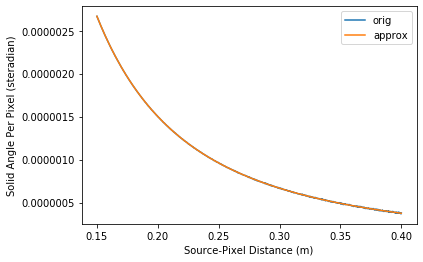

In [2]:
from matplotlib import pyplot as plt
import numpy as np

d=np.linspace(0.15,0.4,num=1000)
x=245e-6
omega=4*np.arccos((np.sqrt(1+2*(x/(2*d))**2))/(1+(x/(2*d))**2))
omega2=(x/d)**2
plt.xlabel("Source-Pixel Distance (m)")
plt.ylabel("Solid Angle Per Pixel (steradian)")
plt.plot(d,omega,label='orig')
plt.plot(d,omega2,label='approx')
plt.legend()

And to get the required number of photons/s/sr using this information, we must do:<br> <br>

<center> $\beta = \frac{C_{emit}}{\Omega}$, where units go as $\frac{photons}{second*pixel}*{\frac{pixel}{steradian}}$

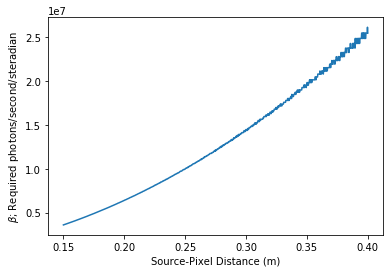

In [81]:
Cemit= 9.6
b=Cemit/(omega)

plt.xlabel("Source-Pixel Distance (m)")
plt.ylabel(r'$\beta$; Required photons/second/steradian') 
plt.plot(d,b)


And the final step: convert this into our required radioactivity. 

Remember that we care about Mn K$\alpha$ photons. For each nuclear decay of Fe-55, there is a 25% chance of getting one of these photons.<sup>5</sup> These photons are released randomly into 4$\pi$ steradians. Thus we must solve for $\alpha$:   <br> <br>

<center> $\frac{\alpha}{4\pi}\frac{decays}{sr*sec}= C_{emit}~\frac{photons}{second*pixel} * \frac{1~pixel}{\Omega~sr} * \frac{1~decay}{0.25~photons}$

or using the just-calculated $\beta$, <br> <br>
    
<center> $\frac{\alpha}{4\pi}\frac{decays}{sr*sec}= \beta~\frac{photons}{second*sr}  * \frac{1~decay}{0.25~photons}$
    

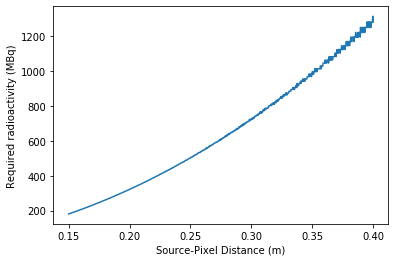

In [82]:
alpha=(b*4*np.pi)/0.25

plt.xlabel("Source-Pixel Distance (m)")
plt.ylabel("Required radioactivity (MBq)")
plt.plot(d,alpha/1e6)

A conservative estimate of the source-pixel distance is 230 mm (credit: Gilles Roudil). This gives us a required radioactivity of

In [83]:
d=0.23
omega=4*np.arccos((np.sqrt(1+2*(x/(2*d))**2))/(1+(x/(2*d))**2))
b=Cemit/(omega)
alpha=(b*4*np.pi)/0.25
print(round(alpha/1e6), "MBq")

424.0 MBq


For the "3204" capsule from Eckert & Zeigler, this corresponds to part number FE532040030M, which has a nominal activity of 1110 MBq (30 mCi). 